In [25]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [26]:
url = 'https://fintual.cl/api/real_assets/'
#15077/days?to_date=2020-01-05
id_conservative_streep = '15077'
id_conservative_clooney = '188'
id_moderate_pit = '187'
id_risky_norris = '186'

data_to_ask= {
    'from_date': '2023-07-01',
    'to_date': '2023-07-05'
}

response = requests.get(url + id_conservative_clooney + '/days?', data=data_to_ask)
print(f'Status Code: {response.status_code}')


Status Code: 200


In [27]:
json = response.json()

In [28]:
df = pd.json_normalize(json['data'])
df = df[['attributes.date', 'attributes.net_asset_value']]
df['attributes.net_asset_value'] = df['attributes.net_asset_value'].astype(np.float64)

In [29]:
def df_roi(df):
    first = df['attributes.net_asset_value'].iloc[0]
    last = df['attributes.net_asset_value'].iloc[-1]
    return (last - first) / first

df_roi(df)

-0.00032061320898066196

In [ ]:
def ask_api_real_assets(id:str, from_date: str, to_date: str):

    url = 'https://fintual.cl/api/real_assets/'

    data_to_ask= {
        'from_date': from_date,
        'to_date': to_date
    }
    response = requests.get(url + id + '/days?', data=data_to_ask)
    print(f'Status Code: {response.status_code}')

    return response


def parse_json(json_data, attribute):
    valores = []
    for item in json_data['data']:
        valores.append([item['attributes']['date'], item['attributes'][attribute]])
    
    valores = pd.DataFrame(valores, columns=['date', attribute])

    if attribute == 'net_asset_value':
        # valores[attribute] = valores[attribute].astype(float)
        pass

    return valores


def calculate_roi(df):
    first_value = df['net_asset_value'].iloc[0]
    last_value = df['net_asset_value'].iloc[-1]
    retorno = (last_value - first_value)/first_value
    return retorno

In [ ]:
def parse_json(json_data, attribute):
    valores = []
    for item in json_data['data']:
        valores.append([item['attributes']['date'], item['attributes'][attribute]])

parse_json(response.json(), 'net_asset_value')

<AxesSubplot: >

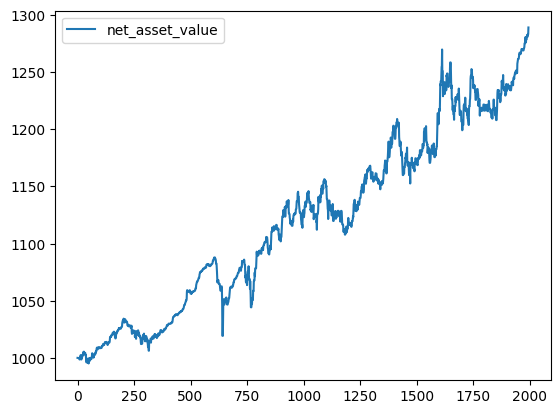

In [153]:
valores = pd.DataFrame(valores, columns=['date', 'net_asset_value'])
valores['net_asset_value'] = valores['net_asset_value'].astype(np.float32)
valores.plot()

In [154]:
first_value = valores['net_asset_value'].iloc[0]
last_value = valores['net_asset_value'].iloc[-1]
retorno = (last_value - first_value)/first_value
retorno

0.28911877